<a href="https://colab.research.google.com/github/tomaszmm3/data-science/blob/main/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
pd.__version__

'2.2.2'

In [4]:
s = pd.Series([1, 2, 3, 4, 5])
s

,0
0,1
1,2
2,3
3,4
4,5


In [10]:
s = pd.Series(data=[2, np.nan, 6, 8], index=['a', 'b', 'c', 'd'], name='sample')
s

,sample
a,2.0
b,NaN
c,6.0
d,8.0


In [14]:
s = pd.Series(data=np.arange(10, 20), index=pd.date_range('20200101', periods=10))
s

,0
2020-01-01,10
2020-01-02,11
2020-01-03,12
2020-01-04,13
2020-01-05,14
2020-01-06,15
2020-01-07,16
2020-01-08,17
2020-01-09,18
2020-01-10,19


In [17]:
s.index
s.values

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [35]:
price = pd.Series(data={"Apple": 100, "CD": 20, "Amazon": 200, "KGHM": np.nan})
price
price["Amazon"]
price[2]
price.count()
price.value_counts()
price.sum()
price.max()
price.describe()
price.value_counts(dropna=False)
price.nlargest(2)
price.rank()
price.sort_values()

<ipython-input-35-6cebdee9249f>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  price[2]


,0
CD,20.0
Apple,100.0
Amazon,200.0
KGHM,NaN


In [38]:
pricePLN = price.apply(lambda x: x*3.8)
pricePLN

,0
Apple,380.0
CD,76.0
Amazon,760.0
KGHM,NaN


In [63]:
df = pd.DataFrame(data=[1, 2, 3, 4], index=['a', 'b', 'c', 'd'], columns=["kol1"])
df = pd.DataFrame(data={'WIG20': ['PKO', 'BP'], 'WIG40': ['PEKAO', 'SA']})
df.columns
df.values
df.info()
df.describe()
df['WIG40'] #series
df[['WIG40']] #df
df.WIG40
df.loc(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   WIG20   2 non-null      object
 1   WIG40   2 non-null      object
dtypes: object(2)
memory usage: 164.0+ bytes


In [75]:
df = pd.DataFrame(data=[[12, 23, 34], [98, 76, 54]], columns=['col1', 'col2', 'col3'], index=['row1', 'row2'])
df.loc['row1']
df.iloc[1]
df.loc["row1", "col2"]
df.iloc[1, 2]

np.int64(54)

In [79]:
def fetch_financial_data(company='AMZN'):
    """
    This function fetches stock market quotations.
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')
data = fetch_financial_data()


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, row1 to row2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   col1    2 non-null      int64
 1   col2    2 non-null      int64
 2   col3    2 non-null      int64
dtypes: int64(3)
memory usage: 172.0+ bytes


In [88]:
#data.info()
data.tail()
data.columns = [col.lower() for col in data.columns]
data.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [91]:
data.describe()

,open,high,low,close,volume
count,1256.000000,1256.000000,1256.000000,1256.000000,1.256000e+03
mean,155.348868,157.254230,153.292178,155.309764,6.347134e+07
std,33.488412,33.604451,33.279693,33.469299,2.990643e+07
min,82.800000,83.480000,81.430000,81.820000,1.500750e+07
25%,131.007500,132.720000,129.325000,130.791000,4.305516e+07
50%,159.275500,161.134500,157.225500,159.259000,5.657409e+07
75%,176.536750,178.417500,174.307500,176.185500,7.521672e+07
max,239.015000,242.520000,238.030000,242.060000,2.726617e+08


In [93]:
data[['open', 'close']]


,open,close
Date,,
2025-06-05,209.550,207.910
2025-06-04,206.550,207.230
2025-06-03,207.105,205.710
2025-06-02,204.980,206.650
2025-05-30,204.840,205.010
...,...,...
2020-06-12,130.060,127.251
2020-06-11,130.175,127.898
2020-06-10,132.250,132.372


In [97]:
df = fetch_financial_data("UBER")
df.describe()



,Open,High,Low,Close,Volume
count,1256.000000,1256.000000,1256.000000,1256.000000,1.256000e+03
mean,48.931424,49.804062,48.041188,48.932110,2.388227e+07
std,17.519656,17.695832,17.301747,17.510091,1.631540e+07
min,20.370000,21.125500,19.895000,20.460000,5.200356e+06
25%,33.445000,34.000000,32.647500,33.390000,1.560138e+07
50%,45.620000,46.639950,45.008650,45.770000,2.021322e+07
75%,64.527500,65.391250,63.630000,64.552500,2.784068e+07
max,93.350000,93.600000,90.610000,92.460000,3.642612e+08


In [109]:
df["Average"] = (df.Open + df.Close) / 2
df


,Open,High,Low,Close,Volume,Average
Date,,,,,,
2025-06-05,83.620,85.750,83.0800,84.67,33343311,84.1450
2025-06-04,83.200,84.710,82.9900,83.45,20080520,83.3250
2025-06-03,83.575,83.790,81.8600,82.53,25668362,83.0525
2025-06-02,84.480,84.760,82.6400,83.64,17047042,84.0600
2025-05-30,84.530,84.650,82.5400,84.16,29050884,84.3450
...,...,...,...,...,...,...
2020-06-12,32.730,32.740,31.0400,32.24,27685169,32.4850
2020-06-11,32.630,33.245,30.8904,31.10,45298714,31.8650
2020-06-10,36.690,36.800,34.2650,34.83,43473719,35.7600


In [112]:
df = df.sort_index()

In [135]:
df['Close_shift'] = df.Close.shift(1)
df['Daily_change'] = df.Close / df.Close_shift

del df['Close_shift']
df


,Open,High,Low,Close,Volume,Average,Daily_change
Date,,,,,,,
2020-06-08,37.870,37.900,36.0900,37.08,30099525,37.4750,NaN
2020-06-09,36.700,37.330,36.2500,36.59,15127269,36.6450,0.986785
2020-06-10,36.690,36.800,34.2650,34.83,43473719,35.7600,0.951899
2020-06-11,32.630,33.245,30.8904,31.10,45298714,31.8650,0.892908
2020-06-12,32.730,32.740,31.0400,32.24,27685169,32.4850,1.036656
...,...,...,...,...,...,...,...
2025-05-30,84.530,84.650,82.5400,84.16,29050884,84.3450,0.998339
2025-06-02,84.480,84.760,82.6400,83.64,17047042,84.0600,0.993821
2025-06-03,83.575,83.790,81.8600,82.53,25668362,83.0525,0.986729


<Axes: xlabel='Date'>

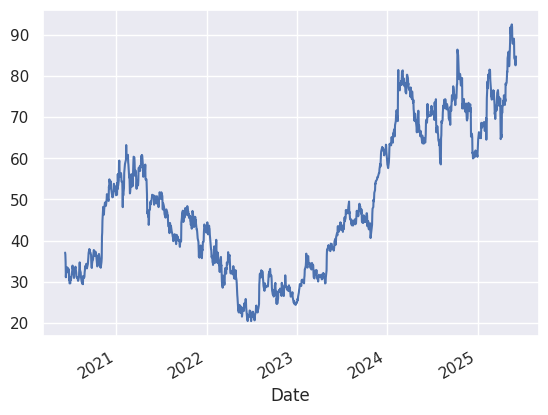

In [139]:
import seaborn as sns
sns.set()
#df.Daily_change.hist(bins=100)
df.Close.plot()



In [143]:
df[df.Daily_change > 1]


,Open,High,Low,Close,Volume,Average,Daily_change
Date,,,,,,,
2020-06-12,32.7300,32.740,31.0400,32.24,27685169,32.48500,1.036656
2020-06-15,31.1600,32.680,31.0201,32.67,21350290,31.91500,1.013337
2020-06-16,34.0000,34.170,32.4300,33.49,21377119,33.74500,1.025099
2020-06-18,33.0000,33.440,32.8000,33.40,15495838,33.20000,1.003304
2020-06-22,32.4300,32.850,31.4300,32.68,17790276,32.55500,1.011765
...,...,...,...,...,...,...,...
2025-05-16,90.3150,92.900,89.7100,91.79,21909595,91.05250,1.018079
2025-05-19,90.8800,92.545,90.5600,92.46,19252125,91.67000,1.007299
2025-05-27,89.1699,89.715,87.8900,89.00,17446940,89.08495,1.014245


In [154]:
df[(df.index < "2024-01-01") & (df.index >= '2023-01-01')]
df[df.index.month == 1]
df[df.index.year == 2023]


,Open,High,Low,Close,Volume,Average,Daily_change
Date,,,,,,,
2023-01-03,25.37,25.750,25.0200,25.36,22155275,25.365,1.025475
2023-01-04,25.73,25.970,25.3200,25.91,14815960,25.820,1.021688
2023-01-05,25.73,26.010,25.5500,25.55,9942038,25.640,0.986106
2023-01-06,25.86,26.540,25.4000,26.40,19443753,26.130,1.033268
2023-01-09,27.30,28.050,27.1500,27.40,24962057,27.350,1.037879
...,...,...,...,...,...,...,...
2023-12-22,61.70,62.235,61.2800,61.71,14715609,61.705,1.004068
2023-12-26,61.71,62.200,61.3136,61.98,16077192,61.845,1.004375
2023-12-27,62.00,63.430,62.0000,63.28,20805951,62.640,1.020975
